In [26]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

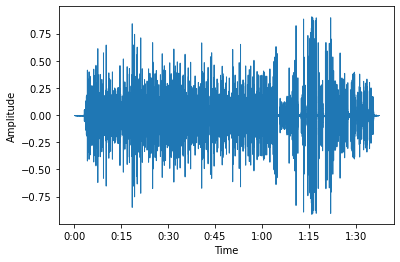

In [9]:
file = "Assorted Channels/7V but sounds like Jelly Epoch - Typing Test.wav"
#waveform
signal, sr = librosa.load(file, sr=22050)  # sr * T -> 600,000 values
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

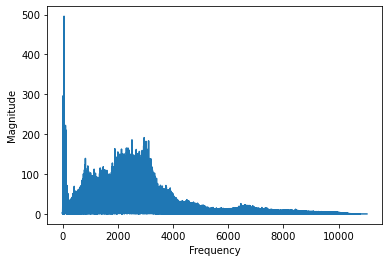

In [14]:
# fft --> power spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

# separate out left frequency only
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

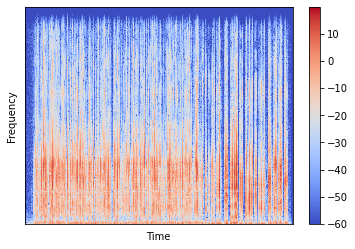

In [19]:
# stft --> spectrogram
n_fft = 2048 # number of samples; window we are considering when performing a single fast fourier transform
hop_length = 512 # amount we are shifting each fourier transform to the right

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

C:\Users\samys\AppData\Local\Temp\ipykernel_574788\901774005.py:2: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, n_fft, hop_length=hop_length, n_mfcc=13)


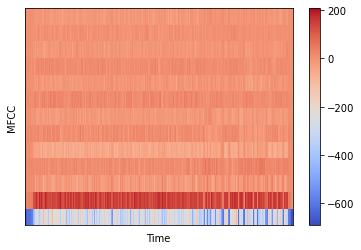

In [23]:
# MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(data=MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()